# DSC540 Project 3

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Write your code under the corresponding questions. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Click on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name at the beginning of the jupyter notebook.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML  
        
        
**DO NOT zip the files.**

Good Luck!

### Shreyas Ravi

**Honor Pledge:**  
I pledge on my honor that I, **Shreyas Ravi**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [2]:
import sklearn
sklearn.__version__

'0.24.2'

In [3]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

### These are the packages I used

In [4]:
# Your package imports here

> NOTE: For the Kernel RBF SVM hyper parameter tuning use these parameters in the questions:
        
        'C': [1, 10, 100, 1000]
        'gamma': [0.001, 0.01, 0.1, 1]

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


#### Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [4]:
df = pd.read_csv('gas_emissions.csv')

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


#### Is there any missing data?

In [6]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [7]:
df[df['CO']>3.0]['AP'].mean()
# average value of AP for co > 3

1015.6900173490633

#### Create a correlation map between the variables. Which variables have high correlation (> |0.9|)?

In [9]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.493098,-0.466288,0.468976,0.193578,0.330112,0.208277,0.109437,0.200909,-0.390647,-0.593580
AP,-0.493098,1.000000,0.084381,-0.094144,-0.043730,-0.081605,-0.290147,0.050326,0.029420,0.200945,0.214236
AH,-0.466288,0.084381,1.000000,-0.245456,-0.297708,-0.260683,0.026251,-0.182732,-0.221706,0.158999,0.065351
AFDP,0.468976,-0.094144,-0.245456,1.000000,0.843958,0.915128,-0.519807,0.884954,0.922991,-0.640789,-0.584452
GTEP,0.193578,-0.043730,-0.297708,0.843958,1.000000,0.892851,-0.620652,0.932337,0.938142,-0.557177,-0.366655
TIT,0.330112,-0.081605,-0.260683,0.915128,0.892851,1.000000,-0.396161,0.951813,0.951590,-0.738092,-0.520081
TAT,0.208277,-0.290147,0.026251,-0.519807,-0.620652,-0.396161,1.000000,-0.633933,-0.656613,0.025768,0.054455
TEY,0.109437,0.050326,-0.182732,0.884954,0.932337,0.951813,-0.633933,1.000000,0.991207,-0.616791,-0.403278
CDP,0.200909,0.029420,-0.221706,0.922991,0.938142,0.951590,-0.656613,0.991207,1.000000,-0.612653,-0.443093
CO,-0.390647,0.200945,0.158999,-0.640789,-0.557177,-0.738092,0.025768,-0.616791,-0.612653,1.000000,0.678394


In [14]:
# displaying variables with correlation > 0.9
c1 = df.corr().stack().sort_values(ascending=False).drop_duplicates()
cor = c1[c1!=1]
print(cor[cor>0.9])

TEY  CDP     0.991207
TIT  TEY     0.951813
     CDP     0.951590
CDP  GTEP    0.938142
TEY  GTEP    0.932337
CDP  AFDP    0.922991
TIT  AFDP    0.915128
dtype: float64


#### Create a scatter plot of 'TEY' vs 'CDP'

<AxesSubplot:xlabel='CDP', ylabel='TEY'>

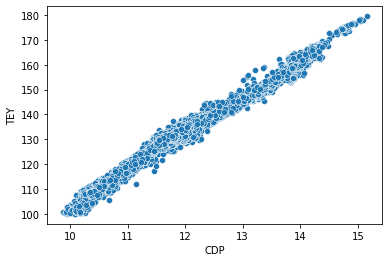

In [15]:
sns.scatterplot(data=df, x="CDP", y="TEY")

#### Create histograms for CO and NOX.

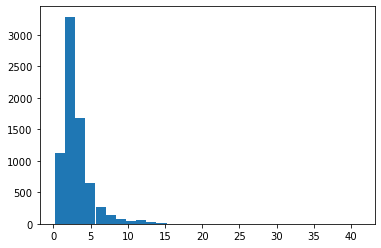

In [25]:
df['CO'].hist(bins=30)
plt.grid(b=None)

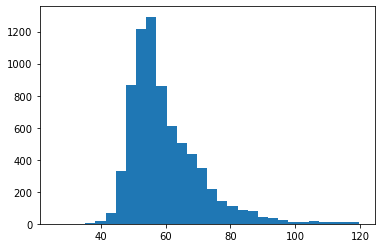

In [26]:
df['NOX'].hist(bins=30)
plt.grid(b=None)

#### Create a sctter plot of CO vs NOX.

<AxesSubplot:xlabel='NOX', ylabel='CO'>

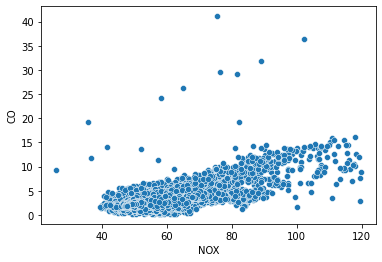

In [28]:
sns.scatterplot(data=df, x="NOX", y="CO")

### Prepare data for machine learning

- We will predict CO using all the other variables.
- NOX, which is another emission gas, will not be used as predictor.
- CO is a continuous variable, thus we will be doing regression.
- Many of algorithms that do classification also have regression counterparts.

In [29]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [32]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [33]:
X_train.shape

(5316, 9)

In [34]:
X_val.shape

(1329, 9)

In [35]:
X_test.shape

(739, 9)

## Utility Functions

You can create helper functions.
For example, create functions that take the score and store it in a dataframe for a specific model.

In [139]:
score_df = pd.DataFrame(columns=['model type','train_r2','val_r2','train_rmse','val_rmse'])
def score(mdl, name):
    train_r2 = metrics.r2_score(y_train, mdl.predict(X_train))
    val_r2 = metrics.r2_score(y_val, mdl.predict(X_val))
    train_rmse = metrics.mean_squared_error(y_train, mdl.predict(X_train))**0.5
    val_rmse = metrics.mean_squared_error(y_val, mdl.predict(X_val))**0.5
    score_df.loc[len(score_df.index)] = [name, train_r2, val_r2, train_rmse, val_rmse]
    


def score_updated(mdl, name, x_train, x_val):
    train_r2 = metrics.r2_score(y_train, mdl.predict(x_train))
    val_r2 = metrics.r2_score(y_val, mdl.predict(x_val))
    train_rmse = metrics.mean_squared_error(y_train, mdl.predict(x_train))**0.5
    val_rmse = metrics.mean_squared_error(y_val, mdl.predict(x_val))**0.5
    score_df.loc[len(score_df.index)] = [name, train_r2, val_r2, train_rmse, val_rmse]
    

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE (Root Mean Squared Error) is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $\rightarrow$ square root $\rightarrow$ RMSE)

In [36]:
from sklearn.linear_model import LinearRegression

In [184]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [185]:
score(lin_reg, 'linear regression')

In [46]:
score_df

,model type,train_r2,val_r2,train_rmse,val_rmse
0,linear regression,0.664009,0.646343,1.272012,1.388489


The above shows the training R squared, validation R squared, training RMSE and Validation RMSE all in one table along with the model type. 

## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop. 
    - During this process your training score will probably decrease, and that is OK. 

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

In [186]:
estimator.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=6, random_state=0)

In [187]:
score(estimator, 'random forest')

In [77]:
score_df

,model type,train_r2,val_r2,train_rmse,val_rmse
0,linear regression,0.664009,0.646343,1.272012,1.388489
1,random forest,0.963542,0.755775,0.419012,1.153843


In [173]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE, min_samples_leaf = 6)

In [174]:
estimator.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=6, random_state=0)

In [175]:
score(estimator, 'random forest')

In [82]:
score_df

,model type,train_r2,val_r2,train_rmse,val_rmse
0,linear regression,0.664009,0.646343,1.272012,1.388489
1,random forest,0.963542,0.755775,0.419012,1.153843
2,random forest,0.849095,0.752569,0.852470,1.161392


In [83]:
score_df.drop(1,inplace=True)

In the second Random Forest row we can see that the difference between the training R squared and Validation R Squared are within 0.10 of each other, which is why i stopped at this value. 

## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Do this for each of the models listed below using the default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR** 

In [84]:
from sklearn.svm import SVR

### Linear SVM Regressor

In [169]:
estimator_svm = SVR(kernel='linear')
estimator_svm.fit(X_train, y_train)
score(estimator_svm, 'Linear SVM')

In [93]:
score_df

,model type,train_r2,val_r2,train_rmse,val_rmse
0,linear regression,0.664009,0.646343,1.272012,1.388489
2,Linear SVM,0.624427,0.602165,1.344852,1.472661


### Polynomial Kernel SVM Regressor

In [170]:
from sklearn.svm import SVR
estimator_pksvm = SVR(kernel='poly')
estimator_pksvm.fit(X_train, y_train)
score(estimator_pksvm, 'Polynomial Kernel SVM')

In [95]:
score_df

,model type,train_r2,val_r2,train_rmse,val_rmse
0,linear regression,0.664009,0.646343,1.272012,1.388489
2,Polynomial Kernel SVM,0.740485,0.731049,1.117914,1.210845


### RBF Kernel SVM Regressor

In [188]:
from sklearn.svm import SVR
estimator_rbf = SVR(kernel='rbf')
estimator_rbf.fit(X_train, y_train)
score(estimator_rbf, 'RBF Kernel SVM')

In [91]:
score_df

,model type,train_r2,val_r2,train_rmse,val_rmse
0,linear regression,0.664009,0.646343,1.272012,1.388489
2,RBF Kernel SVM,0.765323,0.747617,1.063073,1.172955


### Q5 [10]

- Take RBF Kernel SVM and perform hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

In [97]:
from sklearn.model_selection import GridSearchCV

In [115]:
svc_cv = SVR(kernel='rbf')
parameters = {
    'gamma': [0.001, 0.01, 0.1, 1],
    'C': [1, 10, 100, 1000]
}

cv = GridSearchCV(svc_cv, parameters, cv=3, n_jobs=-1)
cv.fit(X_train, y_train)

#print_results(cv)

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [117]:
score(cv, 'RBF Kernel SVM')

In [118]:
score_df

,model type,train_r2,val_r2,train_rmse,val_rmse
0,linear regression,0.664009,0.646343,1.272012,1.388489
2,RBF Kernel SVM,0.792241,0.756850,1.000249,1.151300


In [116]:
# c_prm = [1, 10, 100, 1000]
# gamma_prm = [0.001, 0.01, 0.1, 1]
# parameters = {'C':c_prm, 'gamma':gamma_prm}
# rbf = SVR(kernel='rbf')
# rbf_gcv = GridSearchCV(rbf, parameters, cv=4, scoring='f1')
# rbf_gcv.fit(X_train, y_train)
# score(rbf_gcv, 'RBF Kernel SVM')

## Q6 [10]

- Apply PCA and transform the data. 
    - For PCA we need to decide on the number of  components. Take sufficient number of components based on variance explained 
        - generally it is chosen as the number of components that can explain 90% of the variance 
        - or cross-validation accuracy using an ML model.

- Use the PCA transformed data to perform regression with hyper parameter tuning using the models: 
    - Linear Regression
    - Random Forest Regression
    - RBF Kernel Support Vector Regression
  
- For each model:  
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare `PCA RBF SVR` with the `RBF SVR model` from before. Do you observe any change in performance? Please explain. 


In [120]:
from sklearn.decomposition import PCA

In [121]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


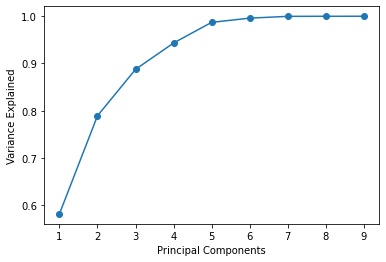

In [122]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose the number of components.

In [123]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

**Linear Regression with PCA transformed data**

In [134]:
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train)

LinearRegression()

In [140]:
score_updated(lin_reg_pca, 'linear regression with pca', X_train_pca, X_val_pca)

In [141]:
score_df

,model type,train_r2,val_r2,train_rmse,val_rmse
0,linear regression with pca,0.664009,0.646343,1.272012,1.388489


**RF Regression with PCA transformed data**

In [143]:
rf_pca = RandomForestRegressor()
parameters = {
    'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14],
    'n_estimators': [50, 100, 150, 200]
}

cv_rf = GridSearchCV(rf_pca, parameters, cv=3, n_jobs=-1)
cv_rf.fit(X_train_pca, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14],
                         'n_estimators': [50, 100, 150, 200]})

In [144]:
best_estimator=cv_rf.best_estimator_

In [145]:
best_estimator

RandomForestRegressor(min_samples_leaf=4, n_estimators=200)

In [148]:
rf_pca_best = RandomForestRegressor(min_samples_leaf=4, n_estimators=200)
rf_pca_best.fit(X_train_pca, y_train)

RandomForestRegressor(min_samples_leaf=4, n_estimators=200)

In [149]:
score_updated(rf_pca_best, 'Random Forest Regressor with PCA', X_train_pca, X_val_pca)

In [150]:
score_df

,model type,train_r2,val_r2,train_rmse,val_rmse
0,linear regression with pca,0.664009,0.646343,1.272012,1.388489
1,Random Forest Regressor with PCA,0.868889,0.755124,0.794596,1.155380


**SVM Regression with PCA transformed data**

In [179]:
svm_pca = SVR(kernel='rbf')
parameters = {
    'gamma': [0.001, 0.01, 0.1, 1]
}

cv_svm = GridSearchCV(svm_pca, parameters, cv=3, n_jobs=-1)
cv_svm.fit(X_train_pca, y_train)

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'gamma': [0.001, 0.01, 0.1, 1]})

In [180]:
best_estimator=cv_svm.best_estimator_
best_estimator

SVR(gamma=0.1)

In [181]:
svm_pca_best = SVR(gamma=0.1, kernel='rbf')
svm_pca_best.fit(X_train_pca, y_train)

SVR(gamma=0.1)

In [182]:
score_updated(svm_pca_best, 'RBF SVM with PCA', X_train_pca, X_val_pca)

In [177]:
# score_df.drop([3, 4], axis=0, inplace=True)

In [189]:
score_df

,model type,train_r2,val_r2,train_rmse,val_rmse
0,linear regression with pca,0.664009,0.646343,1.272012,1.388489
1,Random Forest Regressor with PCA,0.868889,0.755124,0.794596,1.155380
2,RBF SVM with PCA,0.765189,0.748413,1.063375,1.171103
3,linear regression,0.664009,0.646343,1.272012,1.388489
4,random forest,0.849095,0.752569,0.852470,1.161392
5,RBF Kernel SVM,0.765323,0.747617,1.063073,1.172955


The above shows a comparison between the Linear Regression, Random Forest and RBF Kernel SVM with and without PCA. When we consider Linear Regression we see that despite PCA both have the same training and validation R squared value. Furthermore, when we look at their training and validation RMSE, the values are the same as well. This is different for Random Forest with and without PCA. There is a slight improvement in the training and testing r squared for random forest with PCA, from an R2 value of 0.849095 for training and 0.752569 for validation before PCA and a value of 0.868889 for training and 0.755124 for validation after PCA. There is also a decrease in training and validation RMSE from RF to RF with PCA. There is a similar pattern for RBF Kernel SVM in that the training and validation R2 values increase after PCA. However, there is a slight increase in the training RMSE after PCA, as opposed to the validation RMSE which shows a slight decrease for RBF Kernel SVM. 

## Q7 [10]

#### Let's do  classification 

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [190]:
from sklearn.preprocessing import Binarizer

In [191]:
binarizer = Binarizer(threshold=3)

In [192]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [193]:
y_train_cat = pd.Series(y_train_cat)

<AxesSubplot:>

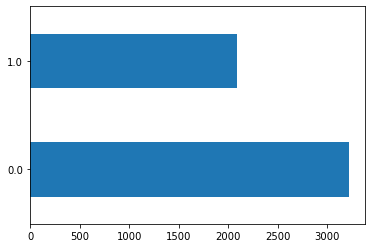

In [194]:
y_train_cat.value_counts().plot.barh()

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data 
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data 
- Using the **pca** transformed training data `X_train_pca2` perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set `X_val_pca2`:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score


In [195]:
from sklearn.svm import SVC

In [197]:
estimators = SVC(kernel ='rbf')

#### SVC Model 1 

In [198]:
parameters = {
    'gamma': [0.001, 0.01, 0.1, 1],
    'C': [1, 10, 100, 1000]
}

cv_1 = GridSearchCV(estimators, parameters, cv=3, n_jobs=-1)
cv_1.fit(X_train, y_train_cat)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [199]:
best_estimator=cv_1.best_estimator_
best_estimator

SVC(C=100, gamma=0.1)

In [202]:
svc_new = SVC(C=100, gamma=0.1, kernel='rbf')
svc_new.fit(X_train, y_train_cat)
svc_new_pred = svc_new.predict(X_train)

In [203]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_cat, svc_new_pred)

array([[3047,  176],
       [ 169, 1924]])

In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_train_cat, svc_new_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      3223
         1.0       0.92      0.92      0.92      2093

    accuracy                           0.94      5316
   macro avg       0.93      0.93      0.93      5316
weighted avg       0.94      0.94      0.94      5316



#### SVC Model 2

In [206]:
estimators1 = SVC(kernel ='rbf')
parameters = {
    'gamma': [0.001, 0.01, 0.1, 1],
    'C': [1, 10, 100, 1000]
}

cv_2 = GridSearchCV(estimators1, parameters, cv=3, n_jobs=-1)
cv_2.fit(X_train_pca2, y_train_cat)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [207]:
best_estimator=cv_2.best_estimator_
best_estimator

SVC(C=1, gamma=1)

In [208]:
svc_new1 = SVC(C=1, gamma=1, kernel='rbf')
svc_new1.fit(X_train_pca2, y_train_cat)
svc_new1_pred = svc_new1.predict(X_val_pca2)

In [210]:
confusion_matrix(y_val_cat, svc_new1_pred)

array([[764,  48],
       [ 70, 447]])

In [211]:
print(classification_report(y_val_cat, svc_new1_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       812
         1.0       0.90      0.86      0.88       517

    accuracy                           0.91      1329
   macro avg       0.91      0.90      0.91      1329
weighted avg       0.91      0.91      0.91      1329



## Q8 [10]

- For regression:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [230]:
# YOUR CODE
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train_pca2, y_train)

Lasso(alpha=0.1)

In [231]:
lasso_pred = lasso.predict(X_val_pca2)

In [232]:
lasso_pred

array([7.70045166, 2.66329276, 2.69519545, ..., 2.56778161, 2.48055648,
       4.31069196])

In [233]:
metrics.r2_score(lasso_pred, y_val)
#r2

0.19491383620602287

In [238]:
metrics.mean_squared_error(lasso_pred, y_val)**0.5
#rmse

1.4437928420925987

In [234]:
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X_train_pca2, y_train)

Ridge(alpha=10)

In [235]:
ridge_pred = ridge.predict(X_val_pca2)

In [236]:
metrics.r2_score(ridge_pred, y_val)
#r2

0.36878682272419183

In [239]:
metrics.mean_squared_error(ridge_pred, y_val)**0.5
#rmse

1.4138856075062114

this attempt to improve the regression models didn't work sinc ethe r squared values decreased considerably as compared to the linear regression performed earlier. This means that the linear regression models are better than the lasso and ridge models which can be seen in their differences in r squared values. 

## Q9 [10]

- For classification:
    - Try at least one classifier other than SVM (RF, GBM, Logistic Regression, etc). 
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [241]:
# YOUR CODE
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train_cat)

AdaBoostClassifier()

In [244]:
abc_pred = abc.predict(X_val)
print(classification_report(y_val_cat, abc_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       812
         1.0       0.88      0.85      0.87       517

    accuracy                           0.90      1329
   macro avg       0.89      0.89      0.89      1329
weighted avg       0.90      0.90      0.90      1329



In [254]:
# hyperparameter tuning for testing and improving classifier
parameters = {
    'learning_rate': [1, 2, 4, 6, 8, 10, 12, 14, 16],
    'n_estimators' : [50, 60, 70, 80, 90, 100]
}

cv_ada = GridSearchCV(abc, parameters, cv=3, n_jobs=-1)
cv_ada.fit(X_train, y_train_cat)


GridSearchCV(cv=3, estimator=AdaBoostClassifier(learning_rate=2), n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 4, 6, 8, 10, 12, 14, 16],
                         'n_estimators': [50, 60, 70, 80, 90, 100]})

In [255]:
best_estimator=cv_ada.best_estimator_

In [256]:
best_estimator

AdaBoostClassifier(learning_rate=1, n_estimators=60)

In [257]:
abc1 = AdaBoostClassifier(learning_rate=1, n_estimators=60)
abc1.fit(X_train, y_train_cat)

AdaBoostClassifier(learning_rate=1, n_estimators=60)

In [258]:
abc1_pred = abc1.predict(X_val)

In [259]:
print(classification_report(y_val_cat, abc1_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       812
         1.0       0.88      0.85      0.87       517

    accuracy                           0.90      1329
   macro avg       0.89      0.89      0.89      1329
weighted avg       0.90      0.90      0.90      1329



slight increases with hyperparameter tuning, however accuracy remains the same as does precision. Only see an increase in recall by 0.01

## Q10 [10]

- Choose the best 2 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the R^2 and RMSE performance metrics on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 2 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metrics (accuracy, recall, precision, f1-score, etc.) on test data for each model. 
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected? 



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.) 



In [264]:
# YOUR CODE
svm_pred = svm_pca_best.predict(X_test_pca)
metrics.r2_score(svm_pred, y_test)

0.3194975920689678

In [263]:
metrics.mean_squared_error(svm_pred, y_test)**0.5

2.425169406488846

In [265]:
# rf_pca_best = RandomForestRegressor(min_samples_leaf=4, n_estimators=200)
# rf_pca_best.fit(X_train_pca, y_train)
rf_pred = rf_pca_best.predict(X_test_pca)
metrics.r2_score(rf_pred, y_test)

0.195120171610758

In [266]:
metrics.mean_squared_error(rf_pred, y_test)**0.5

1.5688058353035799

Both have fairly low r squared values on the testing set which means there is some degree of overfitting occuring

In [267]:
svc_new_pred1 = svc_new.predict(X_test)

In [269]:
print(classification_report(y_test_cat, svc_new_pred1))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       467
         1.0       0.89      0.89      0.89       272

    accuracy                           0.92       739
   macro avg       0.91      0.91      0.91       739
weighted avg       0.92      0.92      0.92       739



There was a slight decrease in the accuracy from the training metrics. The training accuracy was a 0.94 and the current testing accuracy is 0.92.

In [271]:
svc_new2_pred = svc_new1.predict(X_test_pca2)

In [272]:
print(classification_report(y_test_cat, svc_new2_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       467
         1.0       0.89      0.89      0.89       272

    accuracy                           0.92       739
   macro avg       0.91      0.91      0.91       739
weighted avg       0.92      0.92      0.92       739



There is an increase in the accuracy from 0.91 in the training set to 0.92 in the testing. 

- What did you learn in this project? Any suggestions?

In [ ]:
# Your comments

# Thank you
Ilyas Ustun  
twitter: \_ilyas\_ustun\_